In [1]:
from scipy.io import loadmat
from ssmlearnpy import SSMLearn
from ssmlearnpy.reduced_dynamics.advector import advect
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

mat = loadmat('dataRe135.mat')
n_traj_train = 2
t_train = [mat['aData'][i][0].flatten() for i in range(n_traj_train)]
x_full_train = [mat['aData'][i][1] for i in range(n_traj_train)]
x_reduced_train = [np.sqrt(mat['xData'][i][1]) for i in range(n_traj_train)]
x_shift = -np.matmul(mat['pcaComponents'],mat['pcaMean'].T)
ini_Time, end_Time = 400, 1400
for i_traj in range(n_traj_train):
    t_i, x_i, x_r_i = t_train[i_traj], x_full_train[i_traj], x_reduced_train[i_traj]
    idx_Ini, idx_End = int(np.sum(t_i<ini_Time)), int(np.sum(t_i<end_Time))+1
    t_train[i_traj] = t_i[idx_Ini:idx_End]
    x_full_train[i_traj] = x_i[:,idx_Ini:idx_End]-x_shift
    x_reduced_train[i_traj] = x_r_i[:,idx_Ini:idx_End]

n_traj_test = len(mat['aData'])-n_traj_train
t_test = [mat['aData'][i][0].flatten() for i in range(n_traj_train,len(mat['aData']))]
x_full_test = [mat['aData'][i][1] for i in range(n_traj_train,len(mat['aData']))]
x_reduced_test = [np.sqrt(mat['xData'][i][1]) for i in range(n_traj_train,len(mat['aData']))]
ini_Time, end_Time = 100, 1400
for i_traj in range(n_traj_test):
    t_i, x_i, x_r_i = t_test[i_traj], x_full_test[i_traj], x_reduced_test[i_traj]
    idx_Ini, idx_End = int(np.sum(t_i<ini_Time)), int(np.sum(t_i<end_Time))+1
    t_test[i_traj] = t_i[idx_Ini:idx_End]
    x_full_test[i_traj] = x_i[:,idx_Ini:idx_End]-x_shift
    x_reduced_test[i_traj] = x_r_i[:,idx_Ini:idx_End]    


In [2]:
ssm = SSMLearn(
    t = t_train, 
    x = x_full_train, 
    reduced_coordinates = x_reduced_train,
    ssm_dim=2, 
    dynamics_type = 'map'
)
ssm.get_parametrization(poly_degree=2)    
ssm.get_reduced_dynamics(poly_degree=4) 
ssm.predict()  

INFO   2022-09-28 17:56:08 ridge Transforming data
INFO   2022-09-28 17:56:08 ridge Skipping CV on ridge regression
INFO   2022-09-28 17:56:08 ridge Fitting regression model
INFO   2022-09-28 17:56:08 ridge Transforming data
INFO   2022-09-28 17:56:08 ridge Skipping CV on ridge regression
INFO   2022-09-28 17:56:08 ridge Fitting regression model


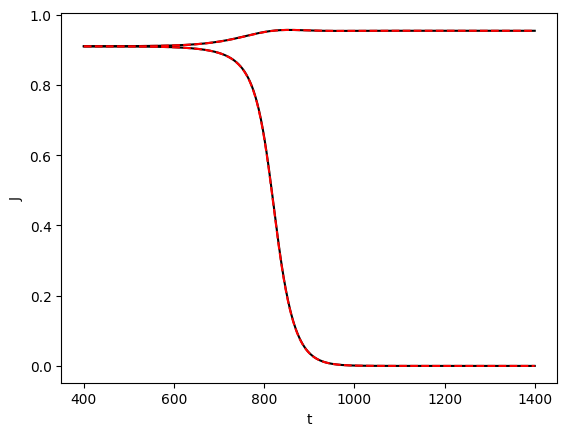

In [3]:
t_predict = ssm.reduced_dynamics_predictions['time']
x_predict = ssm.reduced_dynamics_predictions['reduced_coordinates']
e_predict = ssm.reduced_dynamics_predictions['errors']
for i_traj in range(n_traj_train):
    plt.plot(
        t_train[i_traj], 
        x_reduced_train[i_traj][0,:],
        'k'
    )

    plt.plot(
        t_predict[i_traj], 
        x_predict[i_traj][0,:],
        'r--'
    )

plt.xlabel("t")
plt.ylabel("J")

plt.show()  

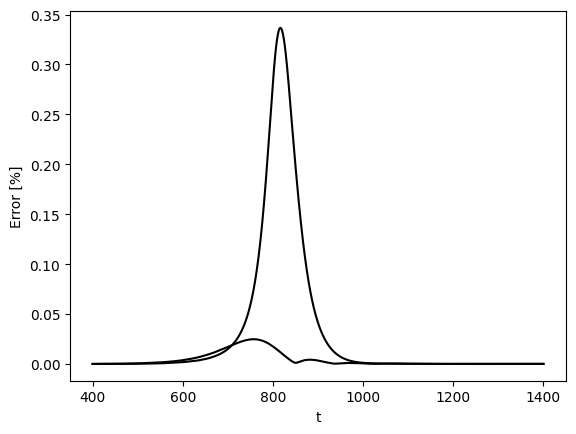

In [4]:
e_predict = ssm.reduced_dynamics_predictions['errors']
for i_traj in range(n_traj_train):
    plt.plot(
        t_predict[i_traj], 
        e_predict[i_traj]*100,
        'k'
    )

plt.xlabel("t")
plt.ylabel("Error [%]")

plt.show()  

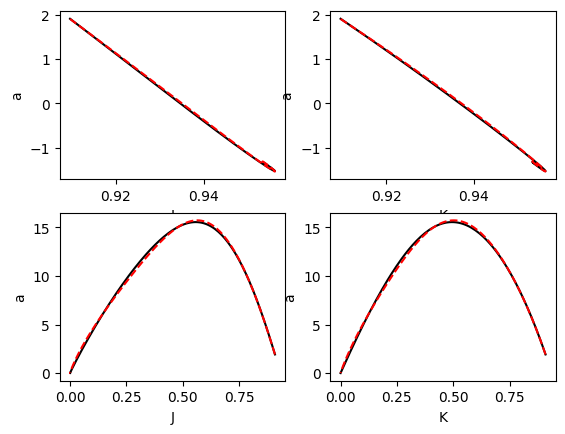

In [5]:
t_predict = ssm.predictions['time']
x_predict = ssm.predictions['observables']
e_predict = ssm.predictions['errors']

fig = plt.figure()
n_coord, idx_coord, c_plot = 2, 1, 0
x_labels = ['J', 'K']
for i_traj in range(n_traj_train):
    for i_coord in range(n_coord):
        c_plot = c_plot + 1
        ax = fig.add_subplot(n_coord, n_traj_train, c_plot)
        ax.plot(
            x_reduced_train[i_traj][i_coord,:], 
            x_full_train[i_traj][idx_coord,:],
            'k'
        )

        ax.plot(
            x_reduced_train[i_traj][i_coord,:],
            x_predict[i_traj][idx_coord,:],
            'r--'
        )

        ax.set_xlabel(x_labels[i_coord])
        ax.set_ylabel("a")

plt.show() 

In [6]:
test_predictions = ssm.predict(t = t_test, x = x_full_test, x_reduced = x_reduced_test)  

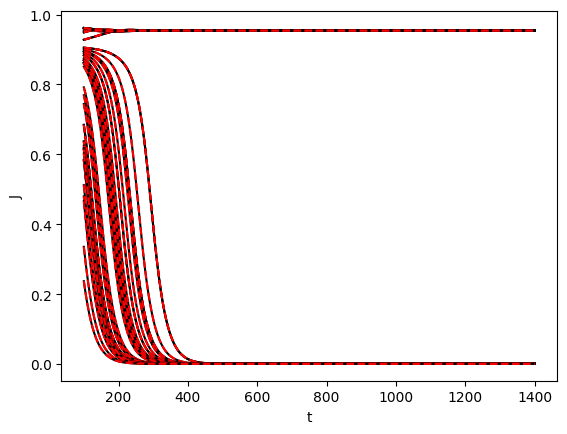

In [8]:
t_predict = test_predictions['time']
x_predict = test_predictions['reduced_coordinates']
e_predict = test_predictions['errors']
for i_traj in range(n_traj_test):
    plt.plot(
        t_test[i_traj], 
        x_reduced_test[i_traj][0,:],
        'k'
    )

    plt.plot(
        t_predict[i_traj], 
        x_predict[i_traj][0,:],
        'r--'
    )

plt.xlabel("t")
plt.ylabel("J")

plt.show()  

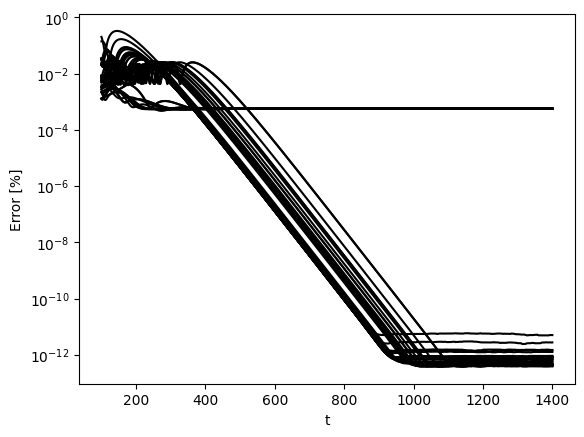

In [10]:
for i_traj in range(n_traj_test):
    plt.plot(
        t_predict[i_traj], 
        e_predict[i_traj]*100,
        'k'
    )

plt.xlabel("t")
plt.ylabel("Error [%]")
plt.yscale("log")
plt.show()  